# Build a spaCy Processing Pipeline



# Exercise #1:  Load Resources

In [1]:
#EXERCISE - Load spaCy Resources


import pandas as pd
#Import spaCy
import spacy
#Install spaCy
#Download the English language model for spaCy
#Load the English model




In [4]:
nlp = spacy.load('en_core_web_sm')

When you execute nlp = spacy.load('en_core_web_sm'), spaCy downloads and loads the pre-trained English language model into memory and assigns it to the variable nlp. This pre-trained model contains information about word vectors, part-of-speech tags, syntactic dependencies, and other linguistic features necessary for various NLP tasks.

## spaCy Processing Pipeline

In spaCy, the order of tasks in the processing pipeline generally follows a predefined sequence, although it's also customizable. By default, spaCy's processing pipeline includes the following components in the specified order:



### Order of Tasks in the Processing Pipeline

| Order | Name         | Definition |
| -----| ------ | ----|
| 1     | Tokenization | Input text is split into individual tokens, such as words and punctuation marks. |
| 2     | Stop Words    | Removes stop words from the text. |
| 3     | POS Tagging   | Assigns grammatical labels (e.g., noun, verb, adjective) to each token in the text based on its syntactic role within the sentence. |
| 4     | Dependency Parsing| Analyzes the grammatical structure of the text by determining the relationships |
| 5     |Lemmatization | Reduces tokens to their base or root form (lemmas)  |
| 6     |  Named Entity Recognition|  Identifies, categorizes persons, organizations, locations, dates, etc.|
| 7     | Other Use Case Tasks| May be included in pipelne (Sentiment Analysis) |


# Exercise #2:  Build a Simple Processing Pipeline

In [64]:
#EXERCISE - Build a Simple Processing Pipeline

# Keep this
text = "A customer in New York City wants to give a review."
doc = nlp(text)


#Processing Pipeline Order

#Tokenization
print('Tokenization\n')
for token in doc:
    print(token.text)

print('\n =============== \n')

#Stop Words Removal
print('stop words removal\n')
tokens_nostop = [token.text for token in doc if not token.is_stop]
print(tokens_nostop)

print('\n =============== \n')

#POS Tagging
print('POS tagging\n')

pos_list = [(token.text,token.pos_) for token in doc]
print(pos_list)

print('\n =============== \n')

#Dependence Parsing


#Lemmatization
print('Lemmatization\n')
lem_list = [token.lemma_ for token in doc if not token.is_punct]
print(lem_list)
print('\n =============== \n')


#Named Entity Recognition
print('NER recognition \n')
ent_list = [(ent.text,ent.label_) for ent in doc.ents]
print(ent_list)
print('\n =============== \n')

Tokenization

A
customer
in
New
York
City
wants
to
give
a
review
.


stop words removal

['customer', 'New', 'York', 'City', 'wants', 'review', '.']


POS tagging

[('A', 'DET'), ('customer', 'NOUN'), ('in', 'ADP'), ('New', 'PROPN'), ('York', 'PROPN'), ('City', 'PROPN'), ('wants', 'VERB'), ('to', 'PART'), ('give', 'VERB'), ('a', 'DET'), ('review', 'NOUN'), ('.', 'PUNCT')]


Lemmatization

['a', 'customer', 'in', 'New', 'York', 'City', 'want', 'to', 'give', 'a', 'review']


NER recognition 

[('New York City', 'GPE')]




# Exercise #3: Build a Processing Pipeline with a File

In [52]:
# Run this cell

# file_path = '/content/sentiment_examples.txt'
file_path = 'sentiment_examples.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    sentiment_texts = file.readlines()

In [53]:
sentiment_texts

['"I love the new features of your product! It has greatly improved my productivity."\n',
 '"The customer support was exceptional in New York. They resolved my issue promptly and professionally."\n',
 '"The quality of your service exceeded my expectations in Prague. I\'m impressed!"\n',
 '"I\'m extremely satisfied with my purchase. The product works flawlessly."\n',
 '"The user interface is intuitive and easy to navigate. Kudos to your design team!"\n',
 '"I had a positive experience shopping on your website. The checkout process was smooth."\n',
 '"Your company values customer feedback, and it shows in the improvements you\'ve made."\n',
 '"The pricing is fair, and the value I get in return is fantastic."\n',
 '"I appreciate the personalized recommendations. It makes shopping more convenient."\n',
 '"The delivery was prompt, and the packaging was secure. Everything arrived in perfect condition."']

In [54]:
# EXERCISE - SCROLL DOWN TO THE "START HERE" SECTION BELOW.

# Initialize empty lists to store the results
token_lists = []
filtered_token_lists = []
pos_tag_lists = []
ner_lists = []

#-----------------------------------------------------------------------------
# START HERE

all_stop_words = nlp.Defaults.stop_words

# Process each sentiment example using spaCy and store the results
for sentiment_text in sentiment_texts:
    doc = nlp(sentiment_text.strip())  # Strip any leading/trailing whitespace

    temp_list = [t.text for t in doc]
    # Tokenization
    token_lists.append(temp_list)
    
    # Stop Word Removal filter
    temp_list_filtered = [w for w in temp_list if w not in all_stop_words]
    
    filtered_token_lists.append(temp_list_filtered)

    # Part-of-Speech Tagging (POS tagging)
    temp_list_pos = [(token.text,token.pos_) for token in doc]

    pos_tag_lists.append(temp_list_pos)
    
    
    # Named Entity Recognition (NER)
    entities = [(ent.text,ent.label_) for ent in doc.ents]
    ner_lists.append(entities)
#-----------------------------------------------------------------------------
# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Sentiment Example': sentiment_texts,
    'Tokens': token_lists,
    'Filtered Tokens': filtered_token_lists,
    'POS Tags': pos_tag_lists,
    'Named Entities': ner_lists
})

# Display the DataFrame
print(results_df)

                                   Sentiment Example  \
0  "I love the new features of your product! It h...   
1  "The customer support was exceptional in New Y...   
2  "The quality of your service exceeded my expec...   
3  "I'm extremely satisfied with my purchase. The...   
4  "The user interface is intuitive and easy to n...   
5  "I had a positive experience shopping on your ...   
6  "Your company values customer feedback, and it...   
7  "The pricing is fair, and the value I get in r...   
8  "I appreciate the personalized recommendations...   
9  "The delivery was prompt, and the packaging wa...   

                                              Tokens  \
0  [", I, love, the, new, features, of, your, pro...   
1  [", The, customer, support, was, exceptional, ...   
2  [", The, quality, of, your, service, exceeded,...   
3  [", I, 'm, extremely, satisfied, with, my, pur...   
4  [", The, user, interface, is, intuitive, and, ...   
5  [", I, had, a, positive, experience, shoppin

In [55]:
results_df.head(2).T

,0,1
Sentiment Example,"""I love the new features of your product! It h...","""The customer support was exceptional in New Y..."
Tokens,"["", I, love, the, new, features, of, your, pro...","["", The, customer, support, was, exceptional, ..."
Filtered Tokens,"["", I, love, new, features, product, !, It, gr...","["", The, customer, support, exceptional, New, ..."
POS Tags,"[("", PUNCT), (I, PRON), (love, VERB), (the, DE...","[("", PUNCT), (The, DET), (customer, NOUN), (su..."
Named Entities,[],"[(New York, GPE)]"


In [28]:
all_stop_words = nlp.Defaults.stop_words

In [65]:
# ORIGINAL TEXT


# # EXERCISE - SCROLL DOWN TO THE "START HERE" SECTION BELOW.

# # Initialize empty lists to store the results
# token_lists = []
# filtered_token_lists = []
# pos_tag_lists = []
# ner_lists = []

# #-----------------------------------------------------------------------------
# # START HERE

# # Process each sentiment example using spaCy and store the results
# for sentiment_text in sentiment_texts:
#     doc = nlp(sentiment_text.strip())  # Strip any leading/trailing whitespace

#     # Tokenization
#     for token in doc:
#         print(token.text)

#     # Stop Word Removal filter


#     # Part-of-Speech Tagging (POS tagging)


#     # Named Entity Recognition (NER)

# #-----------------------------------------------------------------------------
# # Create a DataFrame to organize the results
# results_df = pd.DataFrame({
#     'Sentiment Example': sentiment_texts,
#     'Tokens': token_lists,
#     'Filtered Tokens': filtered_token_lists,
#     'POS Tags': pos_tag_lists,
#     'Named Entities': ner_lists
# })

# # Display the DataFrame
# print(results_df)


# Exercise #4 (Optional): Exploratory Data Analysis

Perform Data Analysis: You can perform various data analysis tasks on the processed data. For example, you can calculate statistics, count occurrences, or visualize the data using plots and charts.

Export Data to CSV or Excel: If you want to save the processed data for future use or analysis in other tools, you can export the DataFrame to a CSV or Excel file.

In [69]:
results_df.head()

,Sentiment Example,Tokens,Filtered Tokens,POS Tags,Named Entities
0,"""I love the new features of your product! It h...","["", I, love, the, new, features, of, your, pro...","["", I, love, new, features, product, !, It, gr...","[("", PUNCT), (I, PRON), (love, VERB), (the, DE...",[]
1,"""The customer support was exceptional in New Y...","["", The, customer, support, was, exceptional, ...","["", The, customer, support, exceptional, New, ...","[("", PUNCT), (The, DET), (customer, NOUN), (su...","[(New York, GPE)]"
2,"""The quality of your service exceeded my expec...","["", The, quality, of, your, service, exceeded,...","["", The, quality, service, exceeded, expectati...","[("", PUNCT), (The, DET), (quality, NOUN), (of,...","[(Prague, GPE)]"
3,"""I'm extremely satisfied with my purchase. The...","["", I, 'm, extremely, satisfied, with, my, pur...","["", I, extremely, satisfied, purchase, ., The,...","[("", PUNCT), (I, PRON), ('m, AUX), (extremely,...",[]
4,"""The user interface is intuitive and easy to n...","["", The, user, interface, is, intuitive, and, ...","["", The, user, interface, intuitive, easy, nav...","[("", PUNCT), (The, DET), (user, NOUN), (interf...",[]


In [67]:
results_df.to_csv('processed_data.csv', index=False)
# results_df.to_excel('processed_data.xlsx', index=False)

In [68]:
# processed_df = pd.read_csv('/content/processed_data.csv', encoding='latin-1')
processed_df = pd.read_csv('processed_data.csv', encoding='latin-1')

In [70]:
processed_df.head()

,Sentiment Example,Tokens,Filtered Tokens,POS Tags,Named Entities
0,"""I love the new features of your product! It h...","['""', 'I', 'love', 'the', 'new', 'features', '...","['""', 'I', 'love', 'new', 'features', 'product...","[('""', 'PUNCT'), ('I', 'PRON'), ('love', 'VERB...",[]
1,"""The customer support was exceptional in New Y...","['""', 'The', 'customer', 'support', 'was', 'ex...","['""', 'The', 'customer', 'support', 'exception...","[('""', 'PUNCT'), ('The', 'DET'), ('customer', ...","[('New York', 'GPE')]"
2,"""The quality of your service exceeded my expec...","['""', 'The', 'quality', 'of', 'your', 'service...","['""', 'The', 'quality', 'service', 'exceeded',...","[('""', 'PUNCT'), ('The', 'DET'), ('quality', '...","[('Prague', 'GPE')]"
3,"""I'm extremely satisfied with my purchase. The...","['""', 'I', ""'m"", 'extremely', 'satisfied', 'wi...","['""', 'I', 'extremely', 'satisfied', 'purchase...","[('""', 'PUNCT'), ('I', 'PRON'), (""'m"", 'AUX'),...",[]
4,"""The user interface is intuitive and easy to n...","['""', 'The', 'user', 'interface', 'is', 'intui...","['""', 'The', 'user', 'interface', 'intuitive',...","[('""', 'PUNCT'), ('The', 'DET'), ('user', 'NOU...",[]


Calculate the count of tokens for each sentiment.

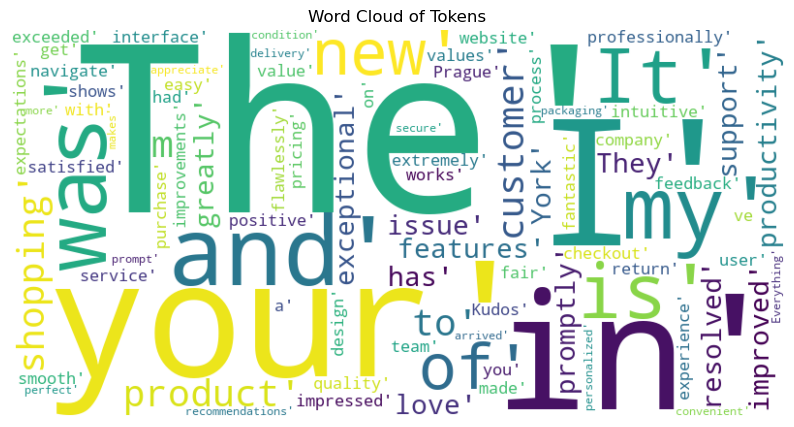

In [74]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all tokens into a single text
all_tokens = ' '.join(processed_df['Tokens'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Tokens')
plt.show()


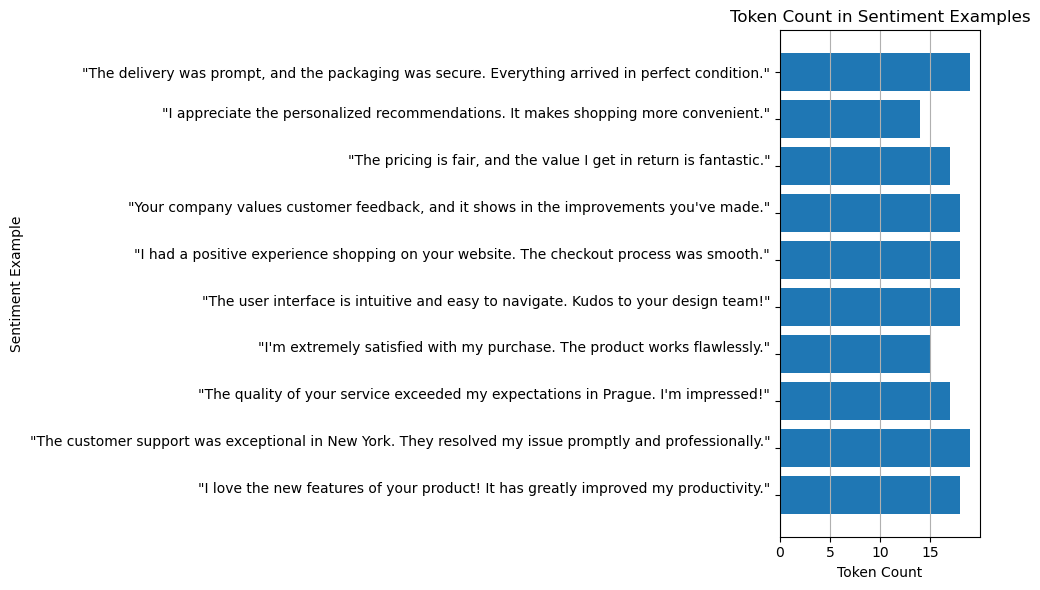

In [75]:
import matplotlib.pyplot as plt

# Load the processed data from the CSV file
# file_path = '/content/processed_data.csv'  # Update with the path to your processed data CSV file
file_path = 'processed_data.csv'
processed_data = pd.read_csv(file_path)

# Calculate the count of tokens for each sentiment example
token_counts = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(processed_data['Sentiment Example'], token_counts)  # Horizontal bar chart
plt.xlabel('Token Count')  # X-axis label
plt.ylabel('Sentiment Example')  # Y-axis label
plt.title('Token Count in Sentiment Examples')  # Chart title
plt.grid(axis='x')  # Show grid lines on the x-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Histogram of Token Lengths: Visualize the distribution of token lengths in the sentiment examples. This can give insights into the length of words used in the text.

/var/folders/f8/657w0x_93w9f5ryhcd7rk3gm0000gn/T/ipykernel_30369/1604240985.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


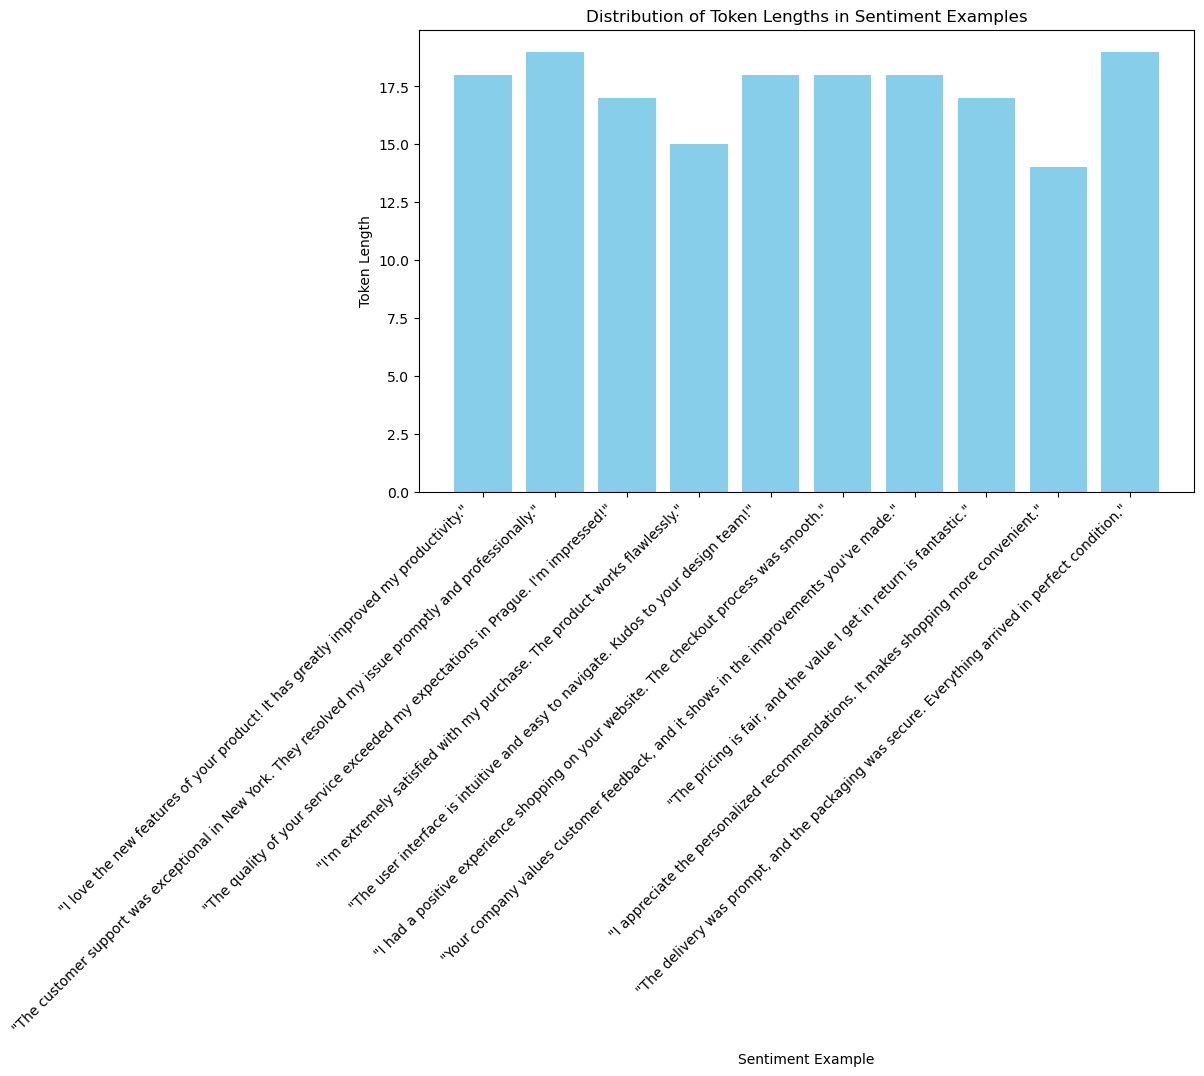

In [76]:
# Load the processed data from the CSV file
file_path = 'processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate token lengths for each sentiment example
processed_data['Token Length'] = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart to visualize token lengths
plt.figure(figsize=(10, 6))
plt.bar(processed_data['Sentiment Example'], processed_data['Token Length'], color='skyblue')
plt.xlabel('Sentiment Example')
plt.ylabel('Token Length')
plt.title('Distribution of Token Lengths in Sentiment Examples')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()




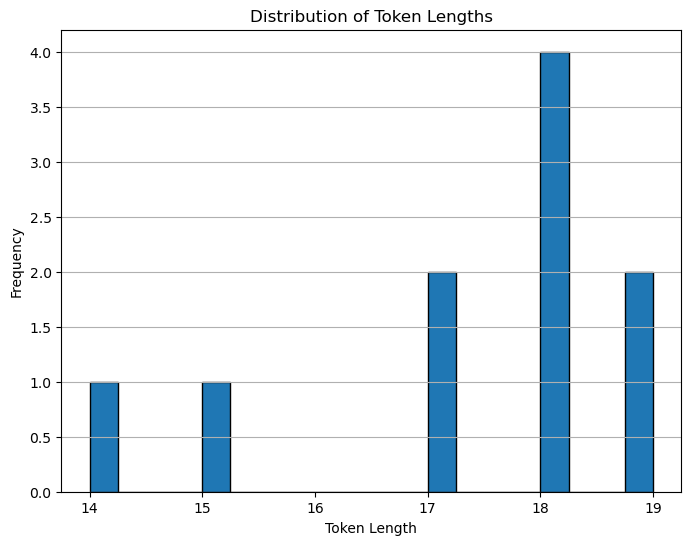

In [77]:
# Calculate token lengths
token_lengths = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(token_lengths, bins=20, edgecolor='black')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.grid(axis='y')
plt.show()


Word Cloud of Tokens: Create a word cloud to visualize the most common words in the sentiment examples. This can highlight frequently used words and themes.